## Tugas 2

Rafly Faldiansyah Putra

210411100063

Preprocessing hasil crawling data dari kompas.com

In [85]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Daftar user agents yang akan dirotasi
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',
]

# Fungsi untuk mengambil dan mem-parsing HTML dari URL
def get_soup(url):
    headers = {
        'User-Agent': random.choice(USER_AGENTS)
    }
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return BeautifulSoup(response.text, 'html.parser')
        else:
            print(f"Error {response.status_code} saat mengambil {url}")
            return None
    except Exception as e:
        print(f"Error: {e}")
        return None

# Fungsi untuk mendapatkan detail artikel dari halaman detail
def get_article_details(detail_url, category_name):
    detail_soup = get_soup(detail_url)
    if detail_soup:
        # Ambil konten dari div dengan class 'read__content'
        content_div = detail_soup.find('div', class_='read__content')
        content = ' '.join([p.text for p in content_div.find_all('p')]) if content_div else 'Tidak ada isi berita'
        
        # Ambil tanggal dari div dengan class 'read__time'
        date_tag = detail_soup.find('div', class_='read__time')
        date = date_tag.text.strip().split('-')[-1].strip() if date_tag else 'Tidak ada tanggal'
        
        title_tag = detail_soup.find('h1')
        title = title_tag.text.strip() if title_tag else 'Tidak ada judul'
        
        return {
            'judul': title,
            'isi_berita': content,
            'tanggal': date,
            'kategori': category_name,
        }
    return None

# Fungsi untuk mendapatkan artikel dari suatu kategori
def get_articles(category_url, category_name, max_articles):
    articles = []
    page = 1
    while len(articles) < max_articles:
        url = f'{category_url}?page={page}'
        print(f"Mengambil: {url}")
        soup = get_soup(url)
        if soup is None:
            break
        article_list = soup.find_all('h3', class_='article__title')
        if not article_list:
            print(f"Tidak ada artikel ditemukan di halaman {page}.")
            break
        for article in article_list:
            if len(articles) >= max_articles:
                break
            title_tag = article.find('a')
            detail_url = title_tag['href'] if title_tag else None
            if detail_url:
                article_details = get_article_details(detail_url, category_name)
                if article_details:
                    articles.append(article_details)
        
        sleep_time = random.uniform(3, 6)
#         print(f"Menunggu selama {sleep_time:.2f} detik sebelum mengambil halaman berikutnya...")
        time.sleep(sleep_time)
        
        page += 1
    return articles

# URL Kategori Kompas
categories = {
    'Olahraga': 'https://www.kompas.com/tag/olahraga',
    'Politik': 'https://www.kompas.com/tag/politik',
}

max_articles=50

# Mengumpulkan semua data
all_articles = []
for category_name, category_url in categories.items():
    print(f"Menambang kategori {category_name}...")
    articles = get_articles(category_url, category_name, max_articles)
    all_articles.extend(articles)

# Simpan ke dalam DataFrame
df = pd.DataFrame(all_articles)

# Simpan ke dalam file CSV tanpa kolom 'url'
df.to_csv('kompas_articles.csv', index=False)

# Tampilkan 10 data pertama dalam bentuk tabel
print(df.head(10))

print("Proses penambangan data selesai, data tersimpan dalam 'kompas_articles.csv' dan 10 data pertama ditampilkan.")


Menambang kategori Olahraga...
Mengambil: https://www.kompas.com/tag/olahraga?page=1
Mengambil: https://www.kompas.com/tag/olahraga?page=2
Mengambil: https://www.kompas.com/tag/olahraga?page=3
Mengambil: https://www.kompas.com/tag/olahraga?page=4
Menambang kategori Politik...
Mengambil: https://www.kompas.com/tag/politik?page=1
Mengambil: https://www.kompas.com/tag/politik?page=2
Mengambil: https://www.kompas.com/tag/politik?page=3
Mengambil: https://www.kompas.com/tag/politik?page=4
                                               judul  \
0  Keluar Rumah Hendak Olahraga, Anak Polisi di P...   
1  Sama-sama Ajang Olahraga Tingkat Nasional, Apa...   
2  Wanita 54 Tahun Berhasil Turunkan Berat Badan ...   
3  Potret Reijnders-Hilgers Berseragam Indonesia,...   
4  Bagaimana Olahraga Bisa Menurunkan Gula Darah?...   
5  Studi Ungkap Durasi Olahraga agar Tensi Stabil...   
6  "Event" Olahraga Bikin Okupansi Hotel di Bali ...   
7  Menuju Indonesia Emas 2045, Kemenpora dan LPDP...   
8  Duga

In [91]:
df=pd.read_csv("kompas_articles.csv")
df.head(1000)

,judul,isi_berita,tanggal,kategori
0,"Keluar Rumah Hendak Olahraga, Anak Polisi di P...",KOMPAS.com - Anak seorang anggota polisi di Ko...,"10/10/2024, 14:45 WIB",Olahraga
1,"Sama-sama Ajang Olahraga Tingkat Nasional, Apa...",KOMPAS.com - Pekan Paralimpiade Nasional (Pepa...,"10/10/2024, 12:30 WIB",Olahraga
2,Wanita 54 Tahun Berhasil Turunkan Berat Badan ...,"KOMPAS.com - Dalam hal penurunan berat badan, ...","10/10/2024, 08:45 WIB",Olahraga
3,"Potret Reijnders-Hilgers Berseragam Indonesia,...",Dua pemain baru Timnas Indonesia Eliano Reijnd...,Tidak ada tanggal,Olahraga
4,Bagaimana Olahraga Bisa Menurunkan Gula Darah?...,KOMPAS.com - Olahraga atau aktivitas fisik mer...,"09/10/2024, 12:00 WIB",Olahraga
...,...,...,...,...
95,Antusias Warga Berdatangan ke Monas untuk Saks...,Perayaan Hari Ulang Tahun (HUT) ke-79 TNI jatu...,Tidak ada tanggal,Politik
96,"Soal Pengelolaan Tol IKN, Menteri Basuki Sebut...",Pengelolaan jalan tol di Ibu Kota Nusantara (I...,Tidak ada tanggal,Politik
97,Kapolda Sulsel Ajak Masyarakat Hindari Politik...,KOMPAS.com - Jelang Pemilihan Kepala Daerah (P...,"04/10/2024, 21:06 WIB",Politik
98,Ma'ruf Amin Berkelakar Zulkifli Hasan Masih Ak...,Wakil Presiden RI Ma'ruf Amin berkelakar bahwa...,Tidak ada tanggal,Politik


In [92]:

df = pd.read_csv("kompas_articles.csv")

df.head()

,judul,isi_berita,tanggal,kategori
0,"Keluar Rumah Hendak Olahraga, Anak Polisi di P...",KOMPAS.com - Anak seorang anggota polisi di Ko...,"10/10/2024, 14:45 WIB",Olahraga
1,"Sama-sama Ajang Olahraga Tingkat Nasional, Apa...",KOMPAS.com - Pekan Paralimpiade Nasional (Pepa...,"10/10/2024, 12:30 WIB",Olahraga
2,Wanita 54 Tahun Berhasil Turunkan Berat Badan ...,"KOMPAS.com - Dalam hal penurunan berat badan, ...","10/10/2024, 08:45 WIB",Olahraga
3,"Potret Reijnders-Hilgers Berseragam Indonesia,...",Dua pemain baru Timnas Indonesia Eliano Reijnd...,Tidak ada tanggal,Olahraga
4,Bagaimana Olahraga Bisa Menurunkan Gula Darah?...,KOMPAS.com - Olahraga atau aktivitas fisik mer...,"09/10/2024, 12:00 WIB",Olahraga


## **Preprocessing**

Preprocessing adalah proses membersihkan dan mempersiapkan data mentah agar siap digunakan oleh model machine learning. Ini meliputi penanganan data yang hilang, normalisasi, mengubah data kategori menjadi angka, dan membersihkan teks. Tujuannya agar data lebih mudah dipahami dan diolah oleh model untuk hasil yang lebih akurat, Berikut adalah beberapa langkah umum dalam pre-processing teks:

### Cleansing

Proses cleansing data adalah tahap pembersihan teks dari elemen-elemen yang tidak relevan terhadap hasil klasifikasi sentimen. Beberapa komponen yang tidak berpengaruh terhadap sentimen, seperti URL, tag HTML, emoji, simbol, angka, dan tanda baca (~!@#$%^&*{}<>:|), dihapus dari dokumen ulasan. Elemen-elemen tersebut dihilangkan untuk mengurangi kebisingan (noise) dalam data. Setelah dihapus, elemen ini digantikan dengan spasi agar struktur kalimat tetap terjaga. Dengan demikian, data menjadi lebih fokus pada kata-kata yang relevan untuk menentukan sentimen, sehingga membantu meningkatkan akurasi model prediksi sentimen.

In [97]:
import re
import pandas as pd
import nltk
import string

def remove_url(text):
    # Fungsi untuk menghapus URL dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', text)
    return text  # Kembali jika bukan string

def remove_html(text):
    # Fungsi untuk menghapus tag HTML dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        html = re.compile(r'<.*?>')
        return html.sub(r'', text)
    return text  # Kembali jika bukan string

def remove_emoji(text):
    # Fungsi untuk menghapus emoji dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        emoji_pattern = re.compile("[" 
            u"\U0001F600-\U0001F64F"  # emotikon wajah
            u"\U0001F300-\U0001F5FF"  # simbol & gambar
            u"\U0001F680-\U0001F6FF"  # transportasi & simbol
            u"\U0001F1E0-\U0001F1FF"  # bendera negara
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text  # Kembali jika bukan string

def remove_numbers(text):
    # Fungsi untuk menghapus angka dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        return re.sub(r'\d+', '', text)
    return text  # Kembali jika bukan string

def remove_symbols(text):
    # Fungsi untuk menghapus simbol dan karakter khusus dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text  # Kembali jika bukan string

# Asumsikan df adalah DataFrame yang berisi data CNN (judul, berita, tanggal, kategori)
# Contoh: df = pd.read_csv('berita-cnn.csv')

# Terapkan fungsi cleansing untuk kolom 'berita'
df['berita_clean'] = df['isi_berita'].apply(remove_url)
df['berita_clean'] = df['berita_clean'].apply(remove_html)
df['berita_clean'] = df['berita_clean'].apply(remove_emoji)
df['berita_clean'] = df['berita_clean'].apply(remove_symbols)
df['berita_clean'] = df['berita_clean'].apply(remove_numbers)

# Tampilkan beberapa baris dari hasil yang sudah dibersihkan
df.head(5)


,judul,isi_berita,tanggal,kategori,berita_clean
0,"Keluar Rumah Hendak Olahraga, Anak Polisi di P...",KOMPAS.com - Anak seorang anggota polisi di Ko...,"10/10/2024, 14:45 WIB",Olahraga,KOMPAScom Anak seorang anggota polisi di Kota...
1,"Sama-sama Ajang Olahraga Tingkat Nasional, Apa...",KOMPAS.com - Pekan Paralimpiade Nasional (Pepa...,"10/10/2024, 12:30 WIB",Olahraga,KOMPAScom Pekan Paralimpiade Nasional Peparna...
2,Wanita 54 Tahun Berhasil Turunkan Berat Badan ...,"KOMPAS.com - Dalam hal penurunan berat badan, ...","10/10/2024, 08:45 WIB",Olahraga,KOMPAScom Dalam hal penurunan berat badan tid...
3,"Potret Reijnders-Hilgers Berseragam Indonesia,...",Dua pemain baru Timnas Indonesia Eliano Reijnd...,Tidak ada tanggal,Olahraga,Dua pemain baru Timnas Indonesia Eliano Reijnd...
4,Bagaimana Olahraga Bisa Menurunkan Gula Darah?...,KOMPAS.com - Olahraga atau aktivitas fisik mer...,"09/10/2024, 12:00 WIB",Olahraga,KOMPAScom Olahraga atau aktivitas fisik merup...


### CASE FOLDING

Pada tahap case folding, semua huruf kapital dalam dokumen ulasan diubah menjadi huruf kecil, atau disebut lowercase. Tujuan dari langkah ini adalah untuk menghilangkan redundansi data yang hanya disebabkan oleh perbedaan kapitalisasi. Misalnya, kata "Ekonomi" dan "ekonomi" secara teknis sama dalam analisis teks, namun tanpa case folding, komputer akan menganggapnya berbeda. Dengan mengonversi seluruh teks menjadi huruf kecil, semua variasi penulisan diseragamkan, sehingga mencegah duplikasi penghitungan atau kesalahan dalam interpretasi data.

In [98]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['berita_clean'].apply(case_folding)

df.head(5)

,judul,isi_berita,tanggal,kategori,berita_clean,case_folding
0,"Keluar Rumah Hendak Olahraga, Anak Polisi di P...",KOMPAS.com - Anak seorang anggota polisi di Ko...,"10/10/2024, 14:45 WIB",Olahraga,KOMPAScom Anak seorang anggota polisi di Kota...,kompascom anak seorang anggota polisi di kota...
1,"Sama-sama Ajang Olahraga Tingkat Nasional, Apa...",KOMPAS.com - Pekan Paralimpiade Nasional (Pepa...,"10/10/2024, 12:30 WIB",Olahraga,KOMPAScom Pekan Paralimpiade Nasional Peparna...,kompascom pekan paralimpiade nasional peparna...
2,Wanita 54 Tahun Berhasil Turunkan Berat Badan ...,"KOMPAS.com - Dalam hal penurunan berat badan, ...","10/10/2024, 08:45 WIB",Olahraga,KOMPAScom Dalam hal penurunan berat badan tid...,kompascom dalam hal penurunan berat badan tid...
3,"Potret Reijnders-Hilgers Berseragam Indonesia,...",Dua pemain baru Timnas Indonesia Eliano Reijnd...,Tidak ada tanggal,Olahraga,Dua pemain baru Timnas Indonesia Eliano Reijnd...,dua pemain baru timnas indonesia eliano reijnd...
4,Bagaimana Olahraga Bisa Menurunkan Gula Darah?...,KOMPAS.com - Olahraga atau aktivitas fisik mer...,"09/10/2024, 12:00 WIB",Olahraga,KOMPAScom Olahraga atau aktivitas fisik merup...,kompascom olahraga atau aktivitas fisik merup...


### TOKENIZATION

Tokenization adalah tahap di mana setiap kata dalam sebuah dokumen dipecah menjadi unit-unit kata yang lebih kecil, atau disebut token. Proses ini memisahkan kata-kata berdasarkan spasi, sehingga setiap kata yang terpisah oleh spasi dianggap sebagai token tersendiri. Sebagai contoh, kalimat "Upaya agar ekonomi stabil" akan diuraikan menjadi token ["Upaya", "agar", "ekonomi", "stabil"].

In [100]:
def tokenize(text):
    # Memeriksa apakah input adalah string
    if isinstance(text, str):
        tokens = text.split()
        return tokens
    else:
        return []  # Mengembalikan list kosong untuk input non-string

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(5)


,judul,isi_berita,tanggal,kategori,berita_clean,case_folding,tokenize
0,"Keluar Rumah Hendak Olahraga, Anak Polisi di P...",KOMPAS.com - Anak seorang anggota polisi di Ko...,"10/10/2024, 14:45 WIB",Olahraga,KOMPAScom Anak seorang anggota polisi di Kota...,kompascom anak seorang anggota polisi di kota...,"[kompascom, anak, seorang, anggota, polisi, di..."
1,"Sama-sama Ajang Olahraga Tingkat Nasional, Apa...",KOMPAS.com - Pekan Paralimpiade Nasional (Pepa...,"10/10/2024, 12:30 WIB",Olahraga,KOMPAScom Pekan Paralimpiade Nasional Peparna...,kompascom pekan paralimpiade nasional peparna...,"[kompascom, pekan, paralimpiade, nasional, pep..."
2,Wanita 54 Tahun Berhasil Turunkan Berat Badan ...,"KOMPAS.com - Dalam hal penurunan berat badan, ...","10/10/2024, 08:45 WIB",Olahraga,KOMPAScom Dalam hal penurunan berat badan tid...,kompascom dalam hal penurunan berat badan tid...,"[kompascom, dalam, hal, penurunan, berat, bada..."
3,"Potret Reijnders-Hilgers Berseragam Indonesia,...",Dua pemain baru Timnas Indonesia Eliano Reijnd...,Tidak ada tanggal,Olahraga,Dua pemain baru Timnas Indonesia Eliano Reijnd...,dua pemain baru timnas indonesia eliano reijnd...,"[dua, pemain, baru, timnas, indonesia, eliano,..."
4,Bagaimana Olahraga Bisa Menurunkan Gula Darah?...,KOMPAS.com - Olahraga atau aktivitas fisik mer...,"09/10/2024, 12:00 WIB",Olahraga,KOMPAScom Olahraga atau aktivitas fisik merup...,kompascom olahraga atau aktivitas fisik merup...,"[kompascom, olahraga, atau, aktivitas, fisik, ..."


### STOPWORD REMOVAL

Stopword removal adalah proses menghapus kata-kata yang dianggap tidak penting atau tidak memiliki makna signifikan dalam analisis teks, seperti "dan," "di," "yang," atau "itu." Kata-kata ini sering muncul dalam kalimat tetapi tidak memberikan informasi penting untuk pemrosesan atau analisis lebih lanjut. Dengan menghapus stopwords, data teks menjadi lebih ringkas dan fokus hanya pada kata-kata yang memiliki bobot lebih besar dalam analisis, seperti saat melakukan klasifikasi atau pemodelan teks.

In [101]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rafly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword_removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))


df.to_csv("preprocessing-kompas.csv", encoding='utf8', index=False)
df.head(5)

,judul,isi_berita,tanggal,kategori,berita_clean,case_folding,tokenize,stopword_removal
0,"Keluar Rumah Hendak Olahraga, Anak Polisi di P...",KOMPAS.com - Anak seorang anggota polisi di Ko...,"10/10/2024, 14:45 WIB",Olahraga,KOMPAScom Anak seorang anggota polisi di Kota...,kompascom anak seorang anggota polisi di kota...,"[kompascom, anak, seorang, anggota, polisi, di...",kompascom anak anggota polisi kota probolinggo...
1,"Sama-sama Ajang Olahraga Tingkat Nasional, Apa...",KOMPAS.com - Pekan Paralimpiade Nasional (Pepa...,"10/10/2024, 12:30 WIB",Olahraga,KOMPAScom Pekan Paralimpiade Nasional Peparna...,kompascom pekan paralimpiade nasional peparna...,"[kompascom, pekan, paralimpiade, nasional, pep...",kompascom pekan paralimpiade nasional peparnas...
2,Wanita 54 Tahun Berhasil Turunkan Berat Badan ...,"KOMPAS.com - Dalam hal penurunan berat badan, ...","10/10/2024, 08:45 WIB",Olahraga,KOMPAScom Dalam hal penurunan berat badan tid...,kompascom dalam hal penurunan berat badan tid...,"[kompascom, dalam, hal, penurunan, berat, bada...",kompascom penurunan berat badan solusi cocok o...
3,"Potret Reijnders-Hilgers Berseragam Indonesia,...",Dua pemain baru Timnas Indonesia Eliano Reijnd...,Tidak ada tanggal,Olahraga,Dua pemain baru Timnas Indonesia Eliano Reijnd...,dua pemain baru timnas indonesia eliano reijnd...,"[dua, pemain, baru, timnas, indonesia, eliano,...",pemain timnas indonesia eliano reijnders mees ...
4,Bagaimana Olahraga Bisa Menurunkan Gula Darah?...,KOMPAS.com - Olahraga atau aktivitas fisik mer...,"09/10/2024, 12:00 WIB",Olahraga,KOMPAScom Olahraga atau aktivitas fisik merup...,kompascom olahraga atau aktivitas fisik merup...,"[kompascom, olahraga, atau, aktivitas, fisik, ...",kompascom olahraga aktivitas fisik salah berma...


## **TF-IDF (Term Frequency-Inverse Document Frequency)**

TF-IDF adalah metode statistik yang digunakan untuk mengevaluasi pentingnya suatu kata dalam sebuah dokumen relatif terhadap koleksi dokumen lainnya. TF-IDF sering digunakan dalam tugas seperti penggalian teks, penambangan informasi, dan pemodelan pembelajaran mesin berbasis teks.
Term Frequency (TF), yang menghitung seberapa sering sebuah kata muncul dalam dokumen, dan Inverse Document Frequency (IDF), yang menilai seberapa jarang kata tersebut muncul di seluruh dokumen dalam koleksi.

TF-IDF bekerja dengan memberikan bobot lebih tinggi pada kata-kata yang sering muncul dalam sebuah dokumen, tetapi jarang muncul di dokumen lain, sehingga membantu mengidentifikasi kata-kata yang paling relevan.


In [106]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("preprocessing-kompas.csv")

# Mengganti NaN dengan string kosong
df['stopword_removal'] = df['stopword_removal'].fillna('')

# Menginisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])


In [107]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,abadi,abang,abba,abdu,abdul,abdurrahman,abnormal,aboe,academy,acak,...,zilky,zilkyproduser,zilkyvideo,zintan,zon,zona,zuhala,zulkifli,zumba,zvezda
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.11536,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
5,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
7,0.04932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
9,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [114]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca dataset
df = pd.read_csv("preprocessing-kompas.csv")

# Mengganti NaN dengan string kosong
df['stopword_removal'] = df['stopword_removal'].fillna('')

# Menginisialisasi TfidfVectorizer dengan normalisasi L2
vectorizer = TfidfVectorizer(norm='l2')

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan 10 baris pertama dari DataFrame TF-IDF
tfidf_df.head(10)


,abadi,abang,abba,abdu,abdul,abdurrahman,abnormal,aboe,academy,acak,...,zilky,zilkyproduser,zilkyvideo,zintan,zon,zona,zuhala,zulkifli,zumba,zvezda
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.11536,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
5,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
7,0.04932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
9,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


# Regresi Logistik

Untuk memprediksi kesesuaian isi berita dengan kategori berita

Confusion Matrix:
[[8 4]
 [0 8]]

Hasil Klasifikasi:
              precision    recall  f1-score   support

    Olahraga       1.00      0.67      0.80        12
     Politik       0.67      1.00      0.80         8

    accuracy                           0.80        20
   macro avg       0.83      0.83      0.80        20
weighted avg       0.87      0.80      0.80        20

Akurasi Model: 0.80


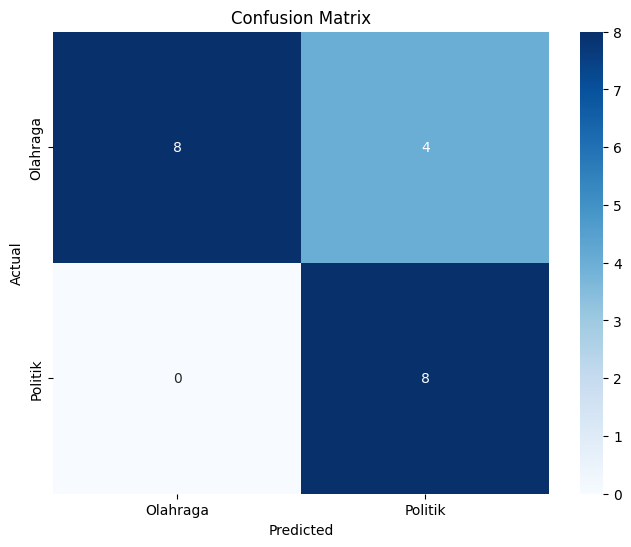

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan target (y)
y = df['kategori']  # Target adalah kategori berita

# Pisahkan dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Inisialisasi model Regresi Logistik
model = LogisticRegression(max_iter=1000)

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nHasil Klasifikasi:")
class_report = classification_report(y_test, y_pred, zero_division=0)
print(class_report)

# Menampilkan akurasi
accuracy = (y_pred == y_test).mean()
print(f"Akurasi Model: {accuracy:.2f}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
